In [22]:
import pandas as pd 
import numpy as np
import seaborn as sns 

In [23]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [24]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [25]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [26]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy="mean")
si.fit(data.iloc[:, 9:10])
data.iloc[:, 9:10] = si.transform(data.iloc[:, 9:10])


In [27]:
data.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [28]:
cat_data = []
data_li = list(data.columns)
for i in data_li:
    if data[i].dtype == "object":
        cat_data.append(i)
cat_data

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [29]:
X= data.iloc[:, 1:-1]
y = data.iloc[:, -1]
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("ecoder", OneHotEncoder(), [0, 4, 5, 6, 9])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [31]:
X

array([[  0.        ,   1.        ,   0.        , ...,   1.        ,
        228.69      ,  36.6       ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
        202.21      ,  28.89323691],
       [  0.        ,   1.        ,   0.        , ...,   1.        ,
        105.92      ,  32.5       ],
       ...,
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
         82.99      ,  30.6       ],
       [  0.        ,   1.        ,   0.        , ...,   0.        ,
        166.29      ,  25.6       ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
         85.28      ,  26.2       ]])

In [32]:
X.shape

(5110, 21)

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs",max_iter=10000)
lr.fit(X_train, y_train)
y_predlr = lr.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, confusion_matrix
print(mean_absolute_error(y_test, y_predlr))
cm = confusion_matrix(y_test, y_predlr)
cm

0.060665362035225046


array([[960,   0],
       [ 62,   0]], dtype=int64)

c:\Users\yash0\Desktop\Python\Machine Learning\Projects\Medical\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stroke', ylabel='Density'>

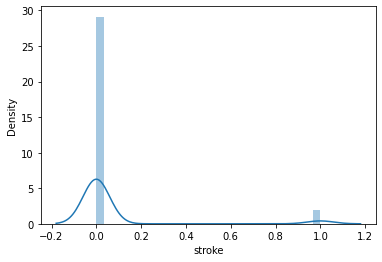

In [36]:
sns.distplot(y_test-y_predlr)

In [37]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_predxg = xg.predict(X_test)

c:\Users\yash0\Desktop\Python\Machine Learning\Projects\Medical\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stroke', ylabel='Density'>

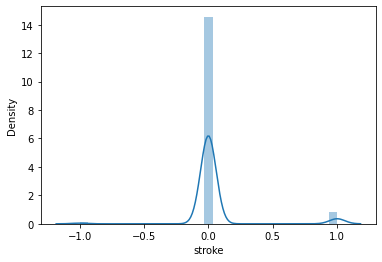

In [38]:
sns.distplot(y_test-y_predxg)

In [39]:
cm1 = confusion_matrix(y_test, y_predxg)
cm1

array([[953,   7],
       [ 55,   7]], dtype=int64)

In [41]:
a = cross_val_score(estimator=xg, X=X_train, y=y_train, cv =10)
print(mean_absolute_error(y_test, y_predxg))
print(a.mean())

0.060665362035225046
0.9461874970036914


In [42]:
a1= cross_val_score(estimator=lr, X=X_train, y=y_train, cv =10)
print(a1.mean())

0.9542571551848121
